<a href="https://colab.research.google.com/github/Noruzzang/AIFFEL_QUEST_cr/blob/master/Main_Quest_CR9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-1 들어가며
일단 노드 학습에 앞서 목차부터 작성하도록 하겠습니다.

#가랏, 몬스터볼! 전설의 포켓몬 찾아 삼만리
###포켓몬, 그 데이터는 어디서 구할까  


(1) 안녕, 포켓몬과 인사해!  
(2) 포켓몬, 그 데이터는 어디서 구할까  
(3) 포켓몬 데이터 불러오기

###전설의 포켓몬? 먼저 샅샅이 살펴보자!  
(1) 결측치와 전체 칼럼  
(2) ID와 이름  
(3) 포켓몬의 속성  
(4) 모든 스탯의 총합  
(5) 세부 스탯  
(6) 세대

###전설의 포켓몬과 일반 포켓몬, 그 차이는?
(1) 전설의 포켓몬의 Total값  
(2) 전설의 포켓몬의 이름

###모델에 넣기 위해! 데이터 전처리하기
(1) 이름의 길이가 10 이상인가?  
(2) 이름에 자주 쓰이는 토큰 추출  
(3) Type 1 & 2! 범주형 데이터 전처리하기

###가랏, 몬스터볼!  
(1) 가장 기본 데이터로 만드는 베이스라인  
(2) 의사 결정 트리 모델 학습시키기  
(3) 피처 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?  
(4) 의사 결정 트리 모델 다시 학습시키기

#1-1 안녕 포켓몬과 인사해   
##포켓몬이란??

포켓몬스터라는 애니메이션을 아시나요? 이미 꽤 오래되었지만, 한때 만화뿐만 아니라 게임으로도 굉장히 많은 인기를 얻었던 애니메이션입니다.

포켓몬이란 말 그대로 포켓(주머니)에 넣어서 데리고 다닐 수 있는 몬스터로, 그 생김새나 속성이 아주 다양합니다. 가장 많이 등장하는 네 마리의 포켓몬만 해도 피카츄는 전기, 이상해씨는 풀, 파이리는 불, 꼬부기는 물 속성의 포켓몬들이죠.

실제로 포켓몬들을 주머니에 넣어 다니지는 않고, 포켓몬은 빨간색과 흰색으로 디자인된 몬스터볼에 들어갈 수 있습니다.

##전설의 포켓몬?
포켓몬 세상에는 "전설의 포켓몬"이 존재합니다. 전설의 포켓몬은 말 그대로 전설적으로 내려오는 존재라 그 모습을 쉽게 볼 수도 없고, 실제로 존재하는지도 직접 보기 전에는 알 수 없는 그런 존재입니다.

##전설의 포켓몬 구별하기
자, 그러면 오늘은 흥미로운 포켓몬 데이터셋을 가지고 실습을 해 보겠습니다. 포켓몬의 이름, 속성, 또는 공격력이나 방어력 등과 같은 스탯 값만을 가지고 전설의 포켓몬인지 아닌지를 구별하도록 해보겠습니다.   

오늘은 이러한 분류 문제를 풀기 위해 데이터를 밑바닥부터 샅샅이 뜯어보는 연습을 할 것입니다.

이러한 과정을 탐색적 데이터 분석(Exploratory Data Analysis, 이하 EDA) 이라고 합니다. EDA는 더 좋은 데이터 분석과 더 좋은 머신러닝 모델을 만들기 위해 필수적인 과정입니다. 더욱 의미 있는, 그리고 더 나은 성능의 모델을 만들어내기 위해서는 무엇을 고민해야 하는지, 그 흐름을 한번 따라와 보시길 바랍니다! 이러한 흐름에 익숙해진다면 어떤 데이터셋을 만나더라도 충분히 빠르고 치밀하게 데이터셋을 다룰 수 있게 될 것입니다.

#1-3 포켓몬 그 데이터는 어디서 구할까?  
포켓몬의 특성을 이용해 전설의 포켓몬을 구별하기 위해서는 먼저   


당연하게도!!



데이터셋이 필요할 것 입니다.     


이제 우리는 캐글(Kaggle)이라는 데이터 분석 경진대회 사이트에 올라와 있는 데이터셋을 활용할 예정입니다.  

https://www.kaggle.com/datasets/abcsds/pokemon  



#1-4 포켓몬 데이터 불러오기



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

###먼저 사용하게 될 라이브러리를 가져오겠습니다.   

numpy와 pandas는 1차원 또는 2차원 형식의 표 데이터를 다루기에 최적화된 라이브러리입니다.  
seaborn과 matplotlib 은 데이터를 그래프 등으로 시각화할 때 쓰이죠. 특히, seaborn은 matplotlib의 상위 버전으로, matplotlib이 조금 더 단순하지만 raw한 느낌이라면, seaborn은 보다 고급화된 그래프를 그릴 수 있습니다.

###데이터셋을 pandas로 불러오기

In [ ]:
import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)

FileNotFoundError: [Errno 2] No such file or directory: '/root/aiffel/pokemon_eda/data/Pokemon.csv'

이제 데이터셋을 pandas로 읽어와 보겠습니다. 우리가 아까 압축을 풀어 저장했던 Pokemon.csv 파일이 현재 코드를 실행하는 파일의 위치와 같은 경로에 있어야 다음 코드가 실행됩니다.

혹시 다른 경로에 있다면 "Pokemon.csv" 부분을 해당 경로에 맞게 수정하세요

In [ ]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

pokemon 변수에 데이터를 저장하고, pandas로 데이터를 나타낸 모습입니다.


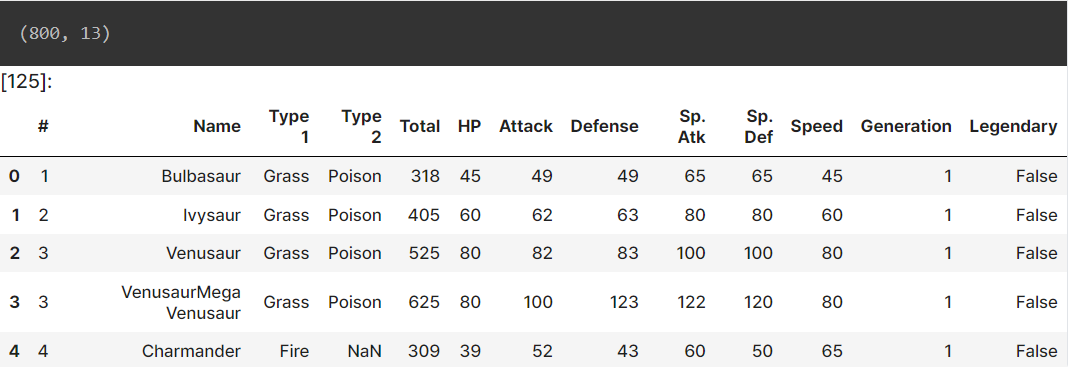

데이터셋은 총 800행, 13열로 이루어져 있습니다.  

포켓몬이 총 800마리이고, 각 포켓몬을 설명하는 특성(feature)은 13개라고 해석할 수 있겠습니다.

이 중 우리가 타겟으로 두고 확인할 데이터는 Legendary (전설의 포켓몬인지 아닌지의 여부)이므로, Legendary == True 값을 가지는 레전드 포켓몬 데이터셋은 legendary 변수에, Legendary == False 값을 가지는 일반 포켓몬 데이터셋은 ordinary 변수에 저장해두겠습니다.






In [ ]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

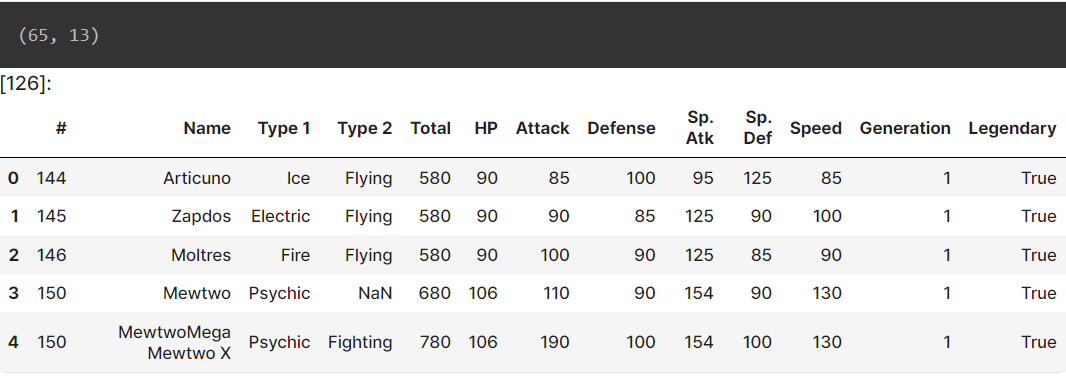

In [ ]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

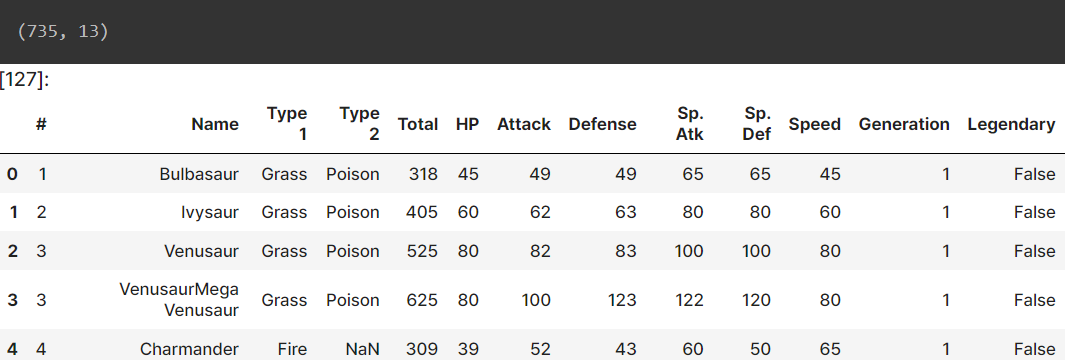

#1-5. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (1) 결측치와 전체 칼럼  
그럼 이제 본격적으로 각 컬럼에 대해 보다 자세하게 뜯어보겠습니다.
데이터가 800개이고, 컬럼이 13개로 큰 데이터셋이 아니므로, 최대한 모든 데이터들을 하나하나 이해해 볼 수 있겠습니다.

데이터셋의 전체 컬럼을 출력하면 다음과 같습니다.

In [ ]:
print(len(pokemon.columns))
pokemon.columns

13

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

각 컬럼이 나타내는 바와 데이터 타입은 다음과 같습니다.

"#" : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. int  
Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str  
Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str  
Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str  
Total : 전체 6가지 스탯의 총합. int  
HP : 포켓몬의 체력. int  
Attack : 물리 공격력. (scratch, punch 등) int  
Defense : 물리 공격에 대한 방어력. int  
Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int  
Sp. Def : 특수 공격에 대한 방어력. int  
Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은
포켓몬이 먼저 공격한다) int  
Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int  
Legendary : 전설의 포켓몬 여부. !! Target feature !! bool

#1-6. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (2) ID와 이름  


###'#' : ID number  
가장 첫 번째 컬럼입니다. 바로 #이라고 쓰여있는, ID 컬럼이죠.
총 몇 종류의 # 값이 있는지 확인해 보겠습니다.



In [ ]:
len(set(pokemon["#"]))

721

###Name : 이름  
이름은 문자열로 나타나는 데이터입니다.
모든 포켓몬은 이름을 갖고 있죠. 특별하게 확인할 것은 아직 없는 것 같고, 혹시 모든 이름이 유일한 이름인지만 확인해 볼까요?

다음과 같이 pokemon["Name"]을 집합(set)으로 만들어 준 후 길이(len)를 확인하면 중복이 사라지면서 유일한 이름의 개수를 확인할 수 있습니다.

In [ ]:
# Q. 총 몇 종류의 포켓몬 이름이 있는지 확인해봅시다!
unique_names = set(pokemon["Name"])  # 중복된 이름 제거
print(f"유일한 이름의 개수: {len(unique_names)}")

#1-7. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (3) 포켓몬의 속성  


포켓몬들의 모든 Type을 types 변수에 저장하겠습니다.

In [ ]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Ghost', 'Ground', 'Fairy', 'Fighting', 'Grass', 'Normal', 'Poison', 'Psychic', 'Dragon', 'Bug', 'Fire', 'Water', 'Flying', 'Dark', 'Ice', 'Steel', 'Electric', 'Rock']

###Type 1 데이터 분포 plot  
일반 포켓몬과 전설의 포켓몬 속성 분포가 각각 어떤지 확인하겠습니다.  
다음과 같이 plt의 subplot을 활용해서 두 개의 그래프를 한 번에 그리면서, 그래프는 sns(seaborn)의 countplot을 활용하겠습니다.
countplot은 말 그대로 데이터의 개수를 표시하는 플롯입니다.

In [ ]:
plt.figure(figsize=(15, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

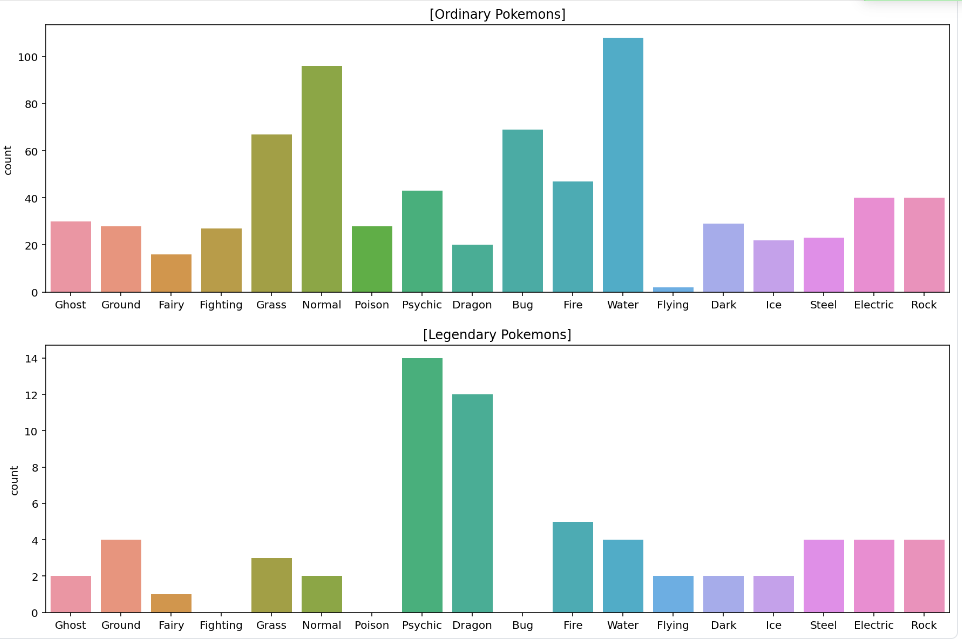

이번에는 피벗 테이블(pivot table)로 각 속성에 Legendary 포켓몬들이 몇 퍼센트씩 있는지 확인해 봅시다.
sort_value를 활용해 높은 것부터 낮은 순으로 정렬해 보았습니다.

In [ ]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

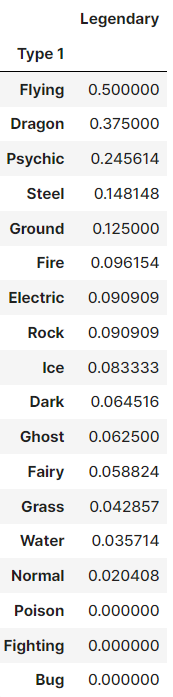

###Type 2 데이터 분포 plot

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")


plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

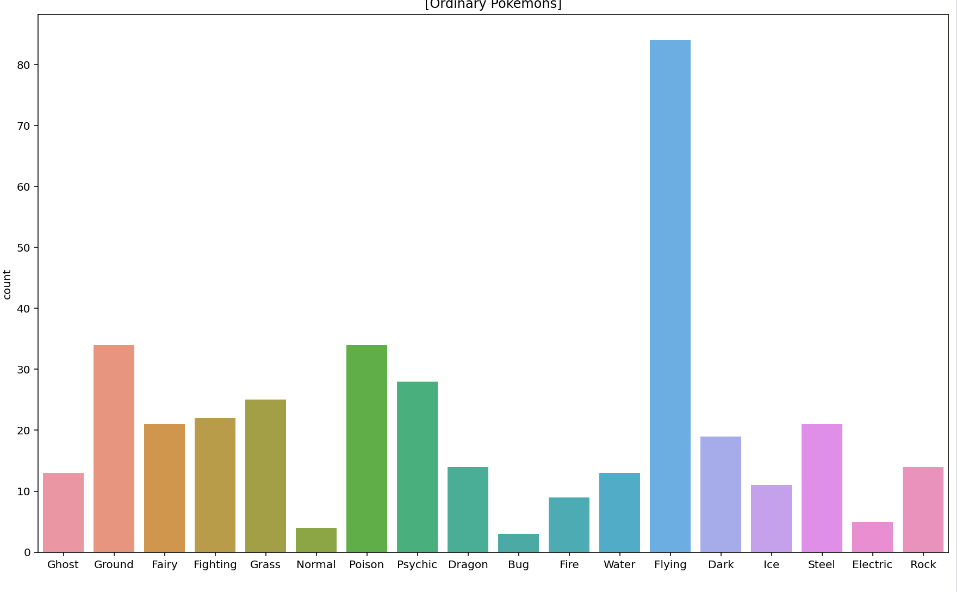

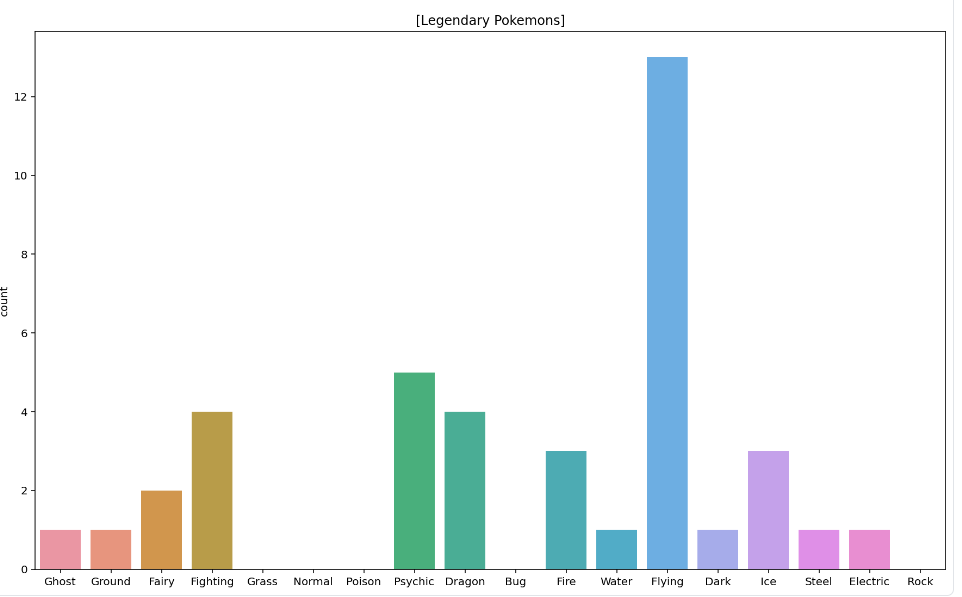

Type 2 또한 일반 포켓몬과 전설의 포켓몬 분포 차이가 보입니다.
Flying 속성의 경우 두 경우 다 가장 많지만, 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 포켓몬은 하나도 없습니다.

In [ ]:
#Type 2에 대한 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

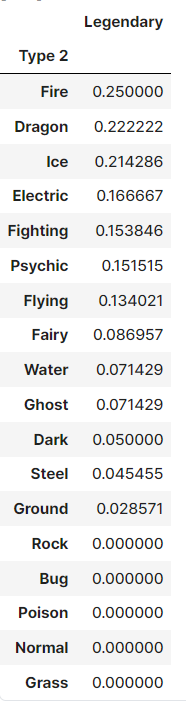

#1-8. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (4) 모든 스탯의 총합

In [ ]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

먼저, 모든 스탯의 종류를 stats라는 변수에 저장해 보겠습니다.

In [ ]:
equal_pokemons = (pokemon['Total'].values == pokemon[stats].sum(axis=1).values)

same_total_count = equal_pokemons.sum()
print(f"총합이 같은 포켓몬의 수: {same_total_count}")

전체 포켓몬에 대해 Total 값이 stats의 총합과 같은지 확인해 봅시다.
아래와 같이 pokemon['Total'].values와 pokemon[stats].values들의 총합이 같은 포켓몬의 개수를 sum으로 확인하겠습니다.

총합이 같은 포켓몬의 수: 800

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

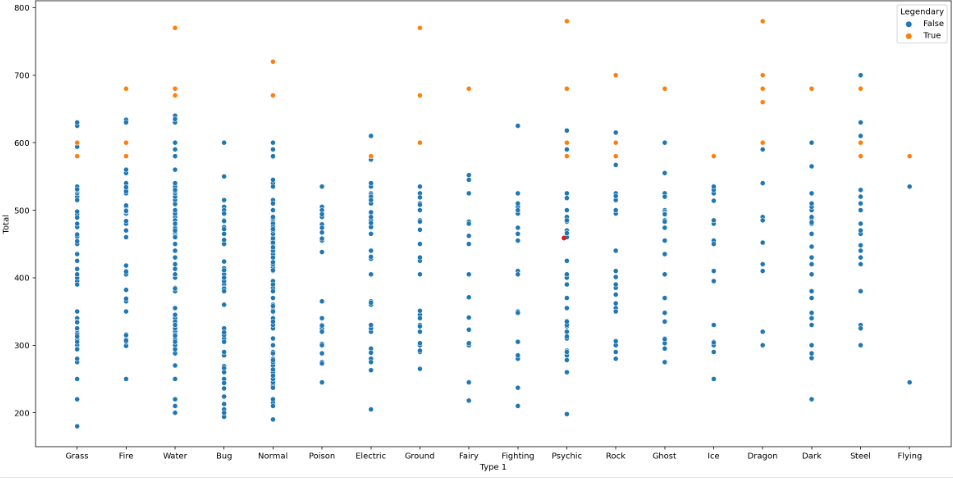

Legendary 여부에 따라 색깔(hue)을 달리하도록 했습니다. 점의 색깔을 보면 Type 1 별로 Total 값을 확인했을 때, 전설의 포켓몬은 주로 Total 스탯 값이 높다는 것이 확인됩니다.

#1-9. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (5) 세부 스탯

###세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

In [ ]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

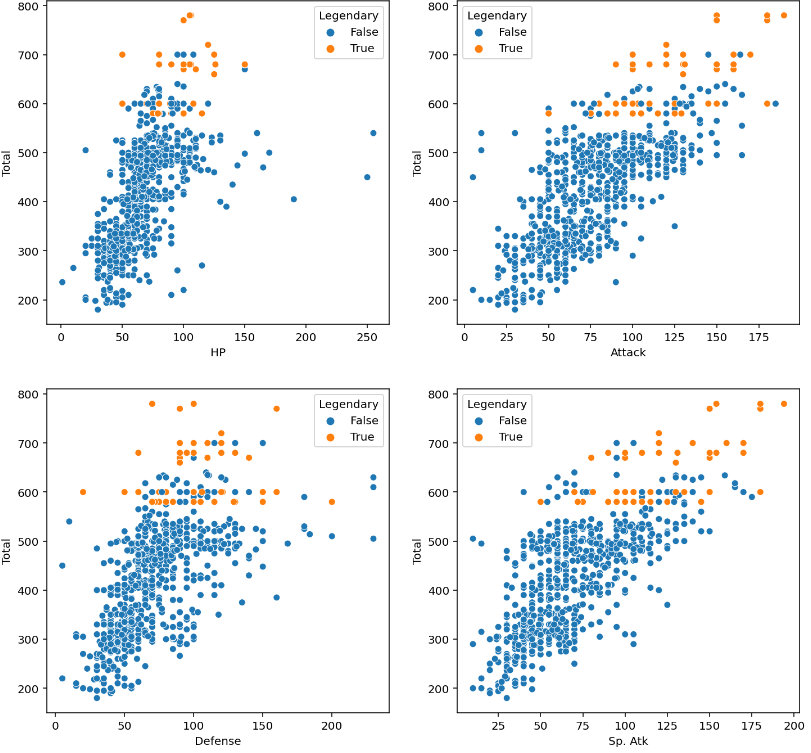

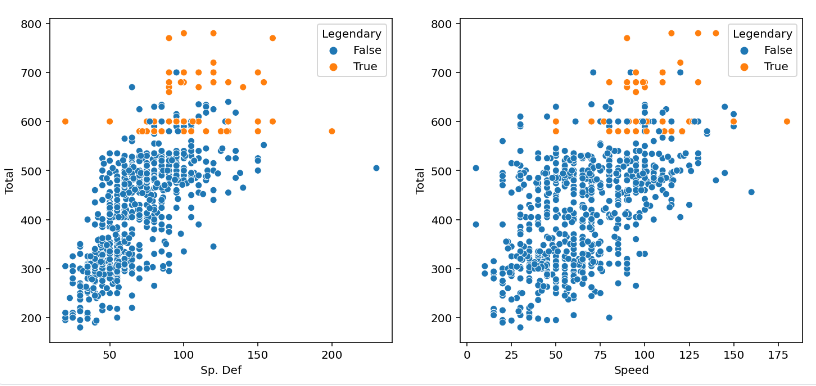

subplot으로 여러 그래프를 생성해 각각의 스텟을 알아보았습니다.


#1-10. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (6) 세대  
###Generation : 포켓몬의 세대  
Generation은 각 포켓몬의 "세대"로, 현재 데이터셋에는 1~6세대의 포켓몬이 존재합니다.
각 세대에 대한 포켓몬의 수를 확인해 봅니다.

In [ ]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

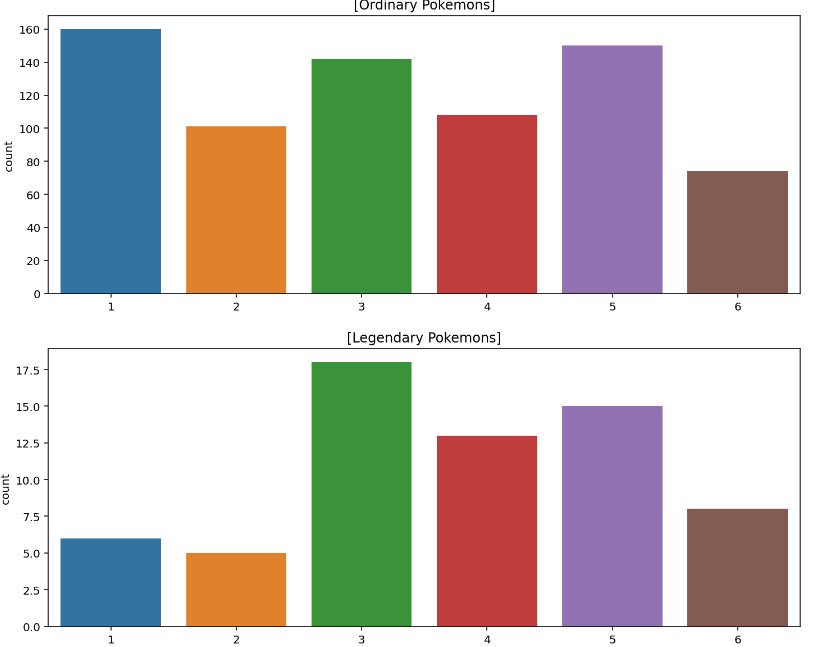

전설의 포켓몬은 1, 2세대에는 많지 않았다가 3세대부터 많아진 후에, 6세대에 다시 줄어든 것을 확인할 수 있습니다.

#1-11. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (1) Total값


####이제 특별히 legendary 포켓몬과 Ordinary 포켓몬을 분리해서 각각 분석해 보겠습니다.


###전설의 포켓몬의 Total 값  


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

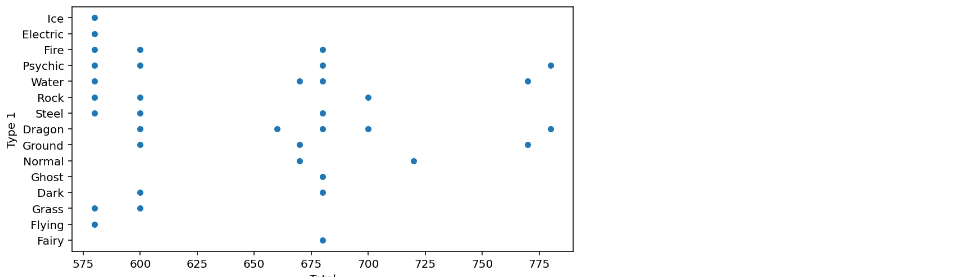

그래프로도 전설의 포켓몬이 가지는 각 Total값에 대한 포켓몬 수를 확인해 봅시다.

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

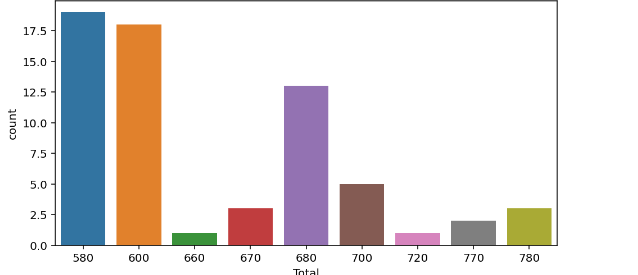

In [ ]:
round(65 / 9, 2)

7.22

7.22

약 7.22마리 끼리는 같은 Total 스탯 값을 가지고 있습니다.

그렇다면 ordinary 포켓몬은 어떨까요? 같은 방법으로 다시 확인해 봅시다.

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=ordinary, y="Type 1", x="Total")
plt.show()

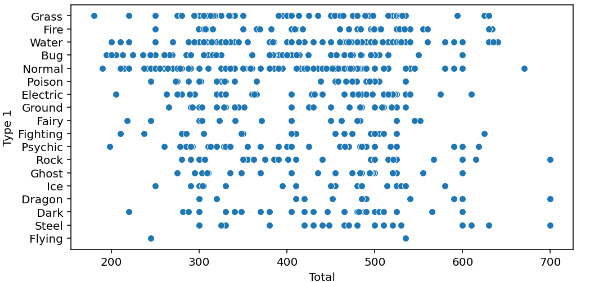

In [ ]:
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]

In [ ]:
round(735 / 195, 2)

ordinary 포켓몬은 약 3.77마리만 같은 Total 스탯 값을 가집니다.


#1-12. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (2) 이름  

###특정 단어가 들어가 있는 이름
특정 단어가 들어가 있는 이름이 많은지, 바로 확인해 봅시다.
아래 행들은 비슷한 이름을 가진 포켓몬들의 모임입니다. 이들을 pd.concat으로 합쳐보겠습니다.

In [ ]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

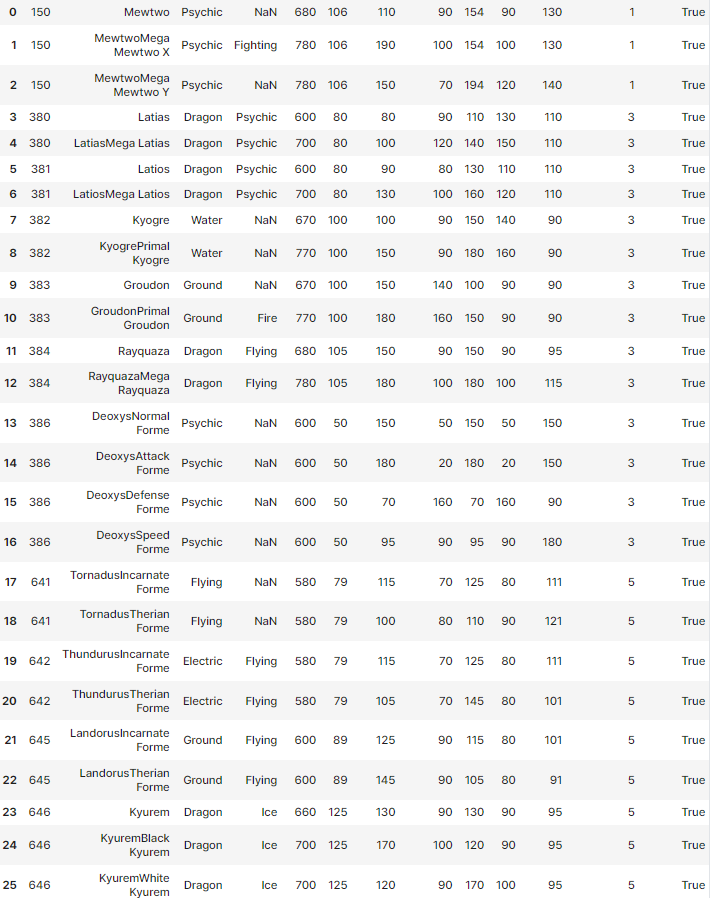

어떤가요? 한눈에 봐도 이름들이 비슷한 경향을 띠는 것을 볼 수 있습니다.
이름은 모든 포켓몬이 각각 다른 유일한(unique) 값들로 이루어진 것을 확인했었는데, 전설의 포켓몬 사이에서는 비슷한 이름이 다수 존재하는 거죠.

위와 비슷한 이유로, 전설의 포켓몬은 이름의 길이도 긴 경우가 많습니다.
데이터셋에 이름 길이 컬럼을 생성해서 비교해 보도록 하겠습니다.

legendary와 ordinary 각각에 모두 "name_count"라는 이름의 길이를 나타내는 컬럼을 만들어줍니다. 파이썬 람다(lambda) 기능을 사용해 행마다 이름의 길이를 구하고, 이를 "name_count" 칼럼에 넣어주었습니다.

In [ ]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

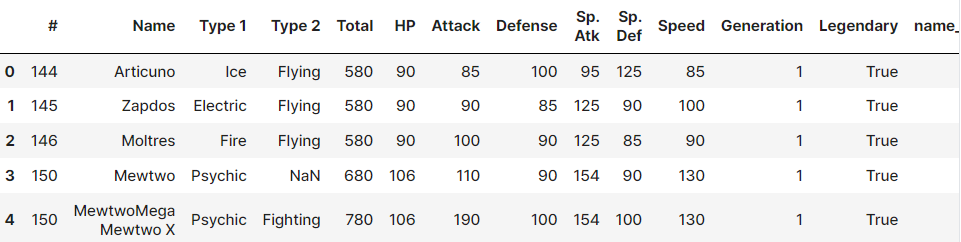

ordinary 포켓몬의 데이터에도 'name_count' 값을 추가했습니다.


In [ ]:

ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

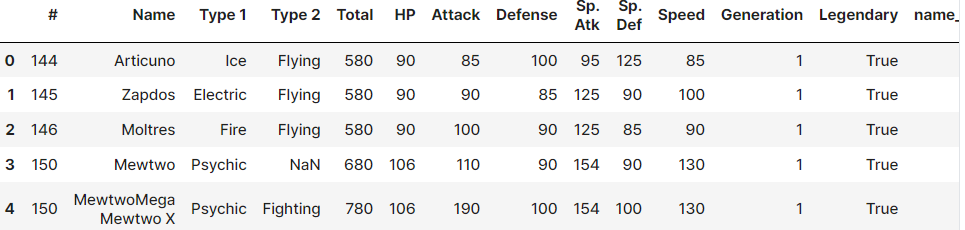

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

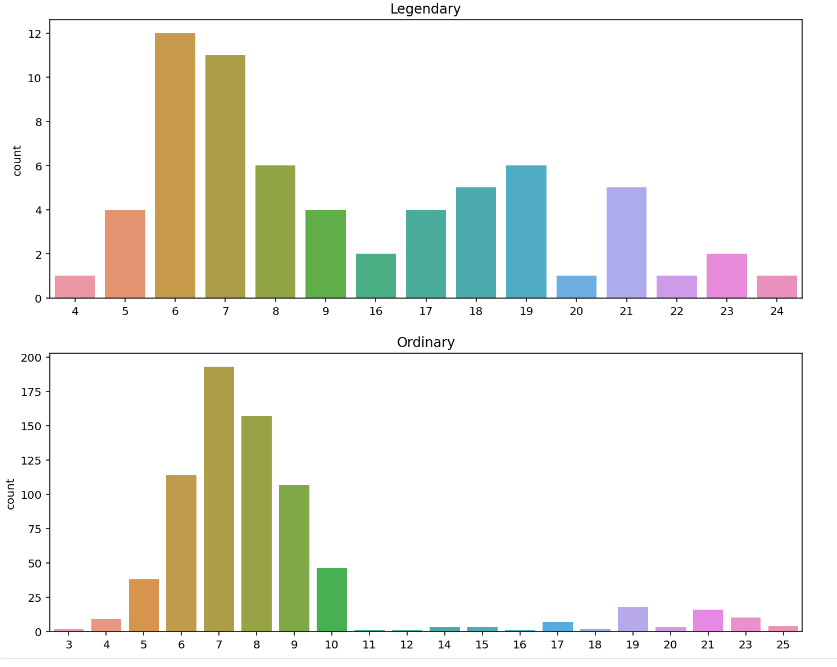

전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은 반면, 일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮습니다.  
그럼 전설 포켓몬과 일반 포켓몬의 이름이 10자 이상일 확률은 어떻게 될까요?


In [ ]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%") # Q. 전설 포켓몬의 이름이 10글자 이상일 확률을 .


print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%") # Q. 일반 포켓몬의 이름이 10글자 이상일 확률을

41.54 %
15.65 %

전설의 포켓몬의 이름이 10 이상일 확률은 41% 를 넘는 반면에, 일반 포켓몬의 이름이 10 이상일 확률은 약 16% 밖에 안됨을 확인할 수 있습니다!
이는 아주 큰 차이이므로 legendary인지 아닌지를 구분하는 데에 큰 의미가 있습니다.

#1-13. 모델에 넣기 위해! 데이터 전처리하기 (1) 이름의 길이가 10 이상인가?  

이름에 관해서는 두 가지를 중점적으로 처리하겠습니다.
1. 이름의 길이 : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성

2. 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리  


###(1) 이름의 길이가 10 이상인가 아닌가

In [ ]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

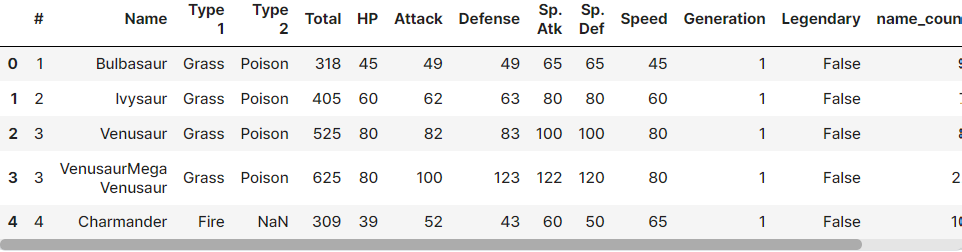

#1-14. 모델에 넣기 위해! 데이터 전처리하기 (2) 이름에 자주 쓰이는 토큰 추출  
다음으로 할 일은 전설의 포켓몬 이름에 가장 많이 쓰이는 토큰을 알아보고 이에 대한 새로운 컬럼을 만드는 것입니다.
이름에 어떤 토큰이 있으면 전설의 포켓몬일 확률이 높을지를 찾아보는 것이죠.

토큰을 추출하기에 앞서, 포켓몬의 이름에 대해 먼저 알아보겠습니다.
포켓몬의 이름은 총 네 가지 타입으로 나뉩니다.

한 단어면 ex. Venusaur  
두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur  
이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X  
알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme

In [ ]:
이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기
이 중 가장 먼저 '알파벳이 아닌 문자'를 포함하는 경우를 처리하도록 하겠습니다.
어떤 문자열이 알파벳으로만 이루어져 있는지를 확인하고 싶을 때는 isalpha() 함수를 사용하면 편리합니다.

In [ ]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

이제 isalpha() 함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인해 봅시다.






In [ ]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

name_isalpha 컬럼이 잘 생성된 것으로 보입니다. 그렇다면 알파벳이 아닌 다른 문자가 이름에 포함된 것은 어떤 것들이 있을까요?

In [ ]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

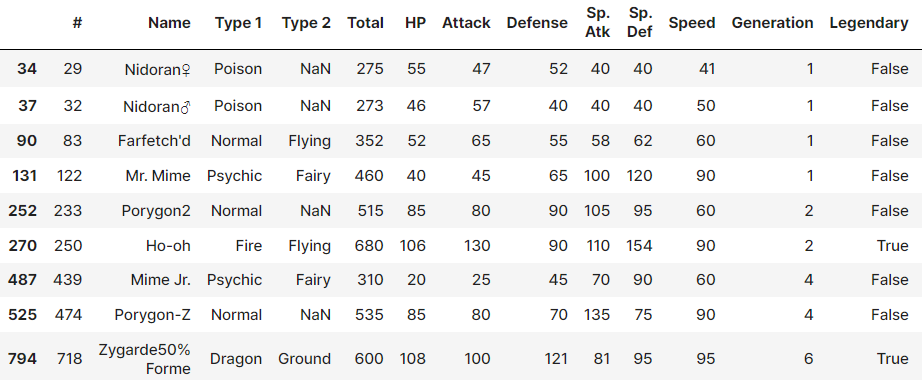

####이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기
그러면 이제 모든 이름은 세 가지 타입으로 나뉘므로 토큰화(tokenizing)할 수 있습니다.
이름에 있는 토큰을 추출하기 위해 이름을 토큰화 (모든 토큰으로 분리) 할 수 있는 함수를 생성해 주겠습니다.

문자열을 처리할 때는 주로 정규표현식(RegEx: Regular Expression) 이라는 기법이 사용됩니다.
정규표현식이란 문자열을 처리하는 방법의 하나로, 특정한 조건을 만족하는 문자를 검색하거나 치환하는 등의 작업을 하고 싶을 때 간편하게 처리할 수 있게 해주는 도구입니다.

In [ ]:
import re   #정규식 re 사용
name = "CharizardMega Charizard X"
name_split = name.split(" ")
name_split       #먼저 이름을 공백을 기준으로 쪼개기

['CharizardMega', 'Charizard', 'X']

지금까지 한 과정을 반복문으로 합치면 한 개의 이름을 이루고 있는 모든 토큰을 tokens에 모아둘 수 있습니다.

In [ ]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

In [ ]:
name = "CharizardMega Charizard X"
tokenize(name)

tokenize(name)라는 간단한 코드로 이름을 모두 토큰화하엿습니다.
이를 이제 전설의 포켓몬 데이터셋에 적용시켜서, 전설의 포켓몬의 이름에 사용된 토큰을 모아보겠습니다.

In [ ]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'MewtwoMega', 'Mewtwo', 'X', 'MewtwoMega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho-oh', 'Regirock', 'Regice', 'Registeel', 'Latias', 'LatiasMega', 'Latias', 'Latios', 'LatiosMega', 'Latios', 'Kyogre', 'KyogrePrimal', 'Kyogre', 'Groudon', 'GroudonPrimal', 'Groudon', 'Rayquaza', 'RayquazaMega', 'Rayquaza', 'Jirachi', 'DeoxysNormal', 'Forme', 'DeoxysAttack', 'Forme', 'DeoxysDefense', 'Forme', 'DeoxysSpeed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'GiratinaAltered', 'Forme', 'GiratinaOrigin', 'Forme', 'Darkrai', 'ShayminLand', 'Forme', 'ShayminSky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'TornadusIncarnate', 'Forme', 'TornadusTherian', 'Forme', 'ThundurusIncarnate', 'Forme', 'ThundurusTherian', 'Forme', 'Reshiram', 'Zekrom', 'LandorusIncarnate', 'Forme', 'LandorusTherian', 'Forme', 'Kyurem', 'KyuremBlack', 'Kyurem', 'KyuremWhite', 'Kyurem', 'Xerneas', 'Yveltal', 'Zygarde50%', 'Forme', 'Diancie', 'DiancieMega', 'Diancie', 'HoopaHoopa', 'Confined', 'HoopaHoopa', 'Unbound', 'Volcanion']


이제 마지막으로 이렇게 전설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼을 만들겠습니다.
Pandas에서 문자열 데이터셋에 특정 구문이 포함되어 있는지 여부는 str.contains 함수로 간단히 확인할 수 있습니다.

In [ ]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

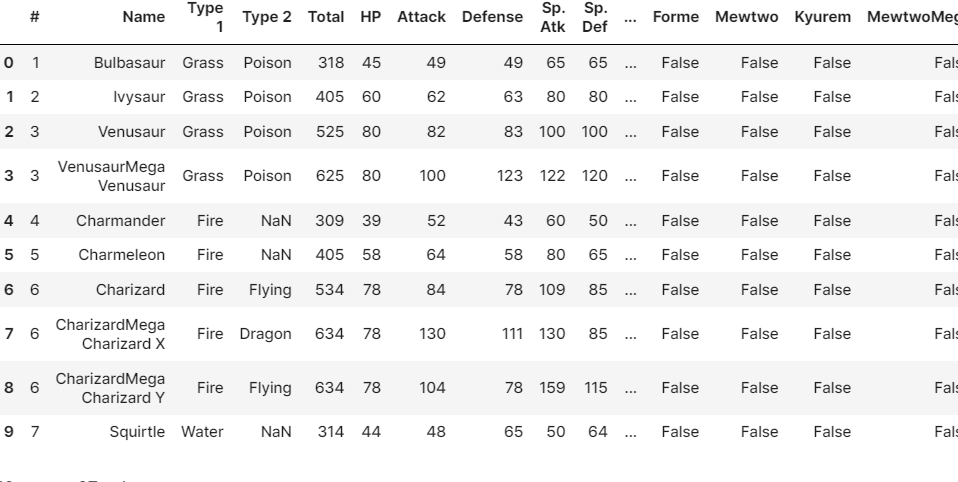

#1-15. 모델에 넣기 위해! 데이터 전처리하기 (3) Type1 & 2! 범주형 데이터 전처리하기  


우선 8가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)합니다.  
두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 합니다.

In [ ]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

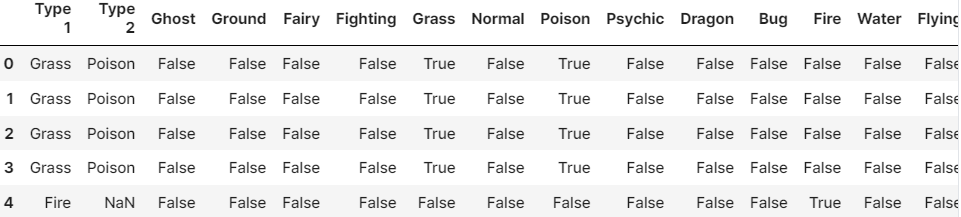

#1-16. 가랏, 몬스터볼! (1) 가장 기본 데이터로 만드는 베이스라인  


In [ ]:
print(original_data.shape)           #원본 데이터 불러오기
original_data.head()

In [ ]:
original_data.columns    #칼럼 확인

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

다음 컬럼 중 의미 없는 컬럼인 #와 문자열 데이터인 Name, Type 1, Type 2 데이터는 제외하고 사용해 보겠습니다.
그리고 target 데이터인 Legendary 또한 당연히 빼주겠습니다.

In [ ]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

target = 'Legendary'          #target 데이터인 Legendary 또한 변수에 저장해 주겠습니다.

In [ ]:

X = original_data[features]

print(X.shape)

X.head()

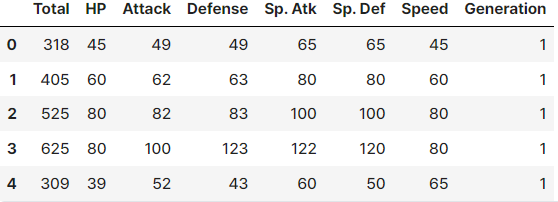

In [ ]:
y = original_data[target]

print(y.shape)

y.head()                    #y 변수에도 target 컬럼에 해당하는 데이터를 저장

이제 훈련 데이터와 학습 데이터를 분류하겠습니다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)

#1-17. 가랏, 몬스터볼! (2) 의사 결정 트리 모델 학습시키기  


In [ ]:
from sklearn.tree import DecisionTreeClassifier        #sklearn 패키지의 DecisionTreeClassifier 모듈 불러오기


In [ ]:
model = DecisionTreeClassifier(random_state=25)      #모델을 정의
model

In [ ]:
model.fit(X_train, y_train)           # 모델을 X_train, y_train 두 데이터로 학습시키고 X_test 데이터를 넣어서 예측한 y_pred 값 만들기
y_pred = model.predict(X_test)
print('슝=3')

In [ ]:
from sklearn.metrics import confusion_matrix  #채점
confusion_matrix(y_test, y_pred)

array  
([[144,   3],  
                [  5,   8]])

위 수치를 해석해 보면 다음과 같습니다.  


TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.  
FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.  
FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.  
TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.

classification_report를 활용해서 다른 값들도 확인해 보겠습니다.






In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

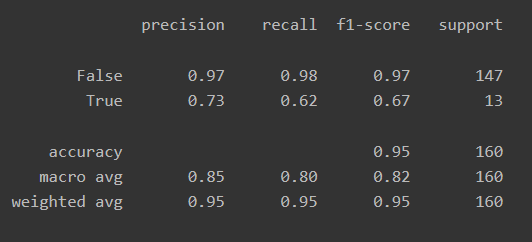

#1-18. 가랏, 몬스터볼! (3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?  


몇 가지 컬럼을 제외하고 모델 학습에 사용할 컬럼들만 추려서 features라는 변수에 저장하겠습니다.  
이 features는 모델을 학습시키면서 입력값으로 사용될 특징들을 포함합니다.

In [ ]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

In [ ]:
target = "Legendary"     #target 을 변수에 저장\
target

In [ ]:
# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
X = original_data[features]
print(X.shape)
X.head()

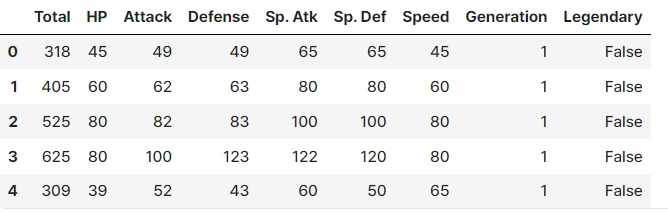

In [ ]:
''' 정답 데이터 'y'도 'target' 변수를 이용해 만들겠습니다.'''
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
y = original_data[target]
print(y.shape)
y.head()

0    False  
1    False  
2    False  
3    False  
4    False  
Name: Legendary, dtype: bool

 X_train 부터 y_test까지로 분리해 주도록 하겠습니다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

실행 완료  
(640, 9) (640,)  
(160, 9) (160,)

#1-19. 가랏, 몬스터볼! (4) 의사 결정 트리 모델 다시 학습시키기  



In [ ]:
model = DecisionTreeClassifier(random_state=25)
model